<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 114.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 101.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 115.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 112.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 112.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 12.0 MB/s eta 0:00:00


#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




Expanded DataFrame for Scatter Plot:
         Age  JobSatPoints_6
0      17.0             NaN
1      39.5             0.0
2      49.5             NaN
3      21.0             NaN
4      21.0             NaN
...     ...             ...
65110  21.0             NaN
65111  29.5             NaN
65112  29.5             NaN
65113  21.0             0.0
65114  21.0             NaN

[65115 rows x 2 columns]


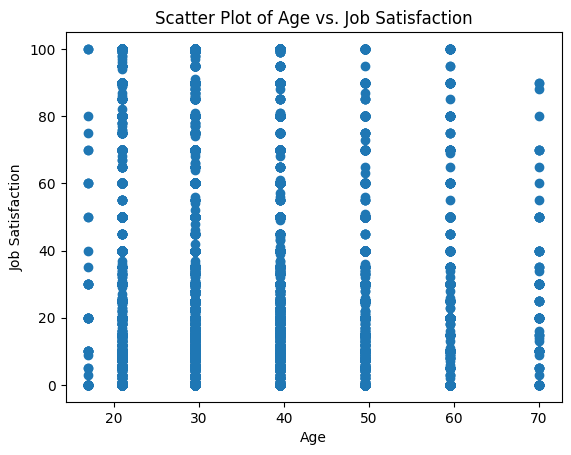

In [3]:
## Write your code here
# Mapping age ranges to numerical values (midpoints)
age_mapping = { 
    'Under 18 years old': 17, 
    '18-24 years old': 21, 
    '25-34 years old': 29.5, 
    '35-44 years old': 39.5, 
    '45-54 years old': 49.5, 
    '55-64 years old': 59.5, 
    '65 years or older': 70, 
    'Prefer not to say': None # Or choose to exclude this category 
}

# Expand the dataset based on counts
expanded_ages = [] 
job_satisfaction = []
for _, row in df.iterrows():
    age_range = row['Age']
    if age_range in age_mapping and age_mapping[age_range] and df['JobSatPoints_6'] is not None:
        expanded_ages.append(age_mapping[age_range])
        job_satisfaction.append(row['JobSatPoints_6']) 

# Create a DataFrame from the expanded ages and work week hours
expanded_df = pd.DataFrame({'Age': expanded_ages, 'JobSatPoints_6': job_satisfaction})

print("Expanded DataFrame for Scatter Plot:\n", expanded_df)

# Create the scatter plot
# plt.figure(figsize=(10, 6))
plt.scatter(x='Age', y='JobSatPoints_6', data=expanded_df)
plt.title('Scatter Plot of Age vs. Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction')
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


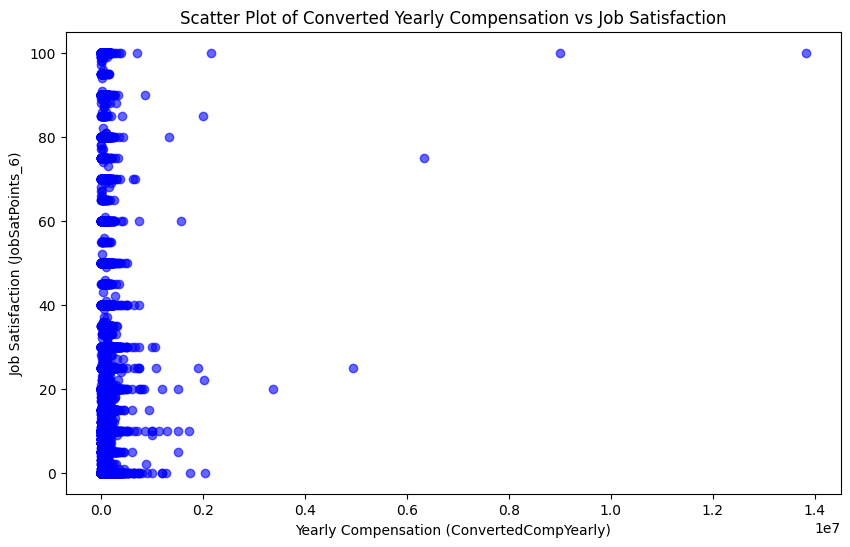

In [4]:
## Write your code here
df1 = df.copy()
df1 = df1.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

                 # Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df1['ConvertedCompYearly'], df1['JobSatPoints_6'],  alpha=0.6, c='blue')

# Add labels and title
plt.title('Scatter Plot of Converted Yearly Compensation vs Job Satisfaction')
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')

# Show plot
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


In [9]:
!pip install seaborn
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 25.8 MB/s eta 0:00:00


Expanded DataFrame for Scatter Plot:
         Age  JobSatPoints_6
0      17.0             NaN
1      39.5             0.0
2      49.5             NaN
3      21.0             NaN
4      21.0             NaN
...     ...             ...
65110  21.0             NaN
65111  29.5             NaN
65112  29.5             NaN
65113  21.0             0.0
65114  21.0             NaN

[65115 rows x 2 columns]


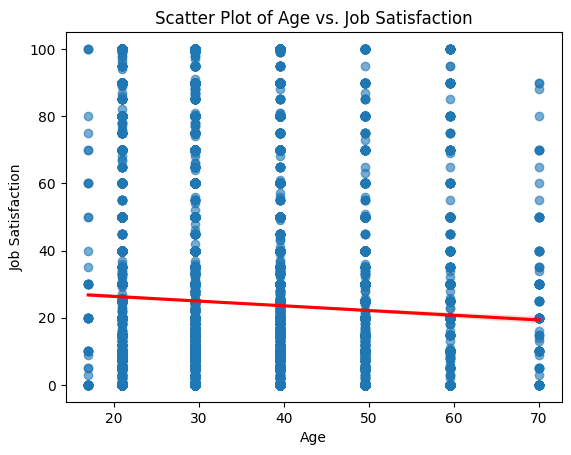

In [12]:
## Write your code here
# Mapping age ranges to numerical values (midpoints)
age_mapping = { 
    'Under 18 years old': 17, 
    '18-24 years old': 21, 
    '25-34 years old': 29.5, 
    '35-44 years old': 39.5, 
    '45-54 years old': 49.5, 
    '55-64 years old': 59.5, 
    '65 years or older': 70, 
    'Prefer not to say': None # Or choose to exclude this category 
}

# Expand the dataset based on counts
expanded_ages = [] 
job_satisfaction = []
for _, row in df.iterrows():
    age_range = row['Age']
    if age_range in age_mapping and age_mapping[age_range] and df['JobSatPoints_6'] is not None:
        expanded_ages.append(age_mapping[age_range])
        job_satisfaction.append(row['JobSatPoints_6']) 

# Create a DataFrame from the expanded ages and work week hours
expanded_df = pd.DataFrame({'Age': expanded_ages, 'JobSatPoints_6': job_satisfaction})
sns.regplot(
    x='Age', 
    y='JobSatPoints_6', 
    data=expanded_df, 
    scatter_kws={'alpha': 0.6},  # Transparency for scatter points
    line_kws={'color': 'red'}    # Regression line color
)
print("Expanded DataFrame for Scatter Plot:\n", expanded_df)

# Create the scatter plot
# plt.figure(figsize=(10, 6))

plt.title('Scatter Plot of Age vs. Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction')
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


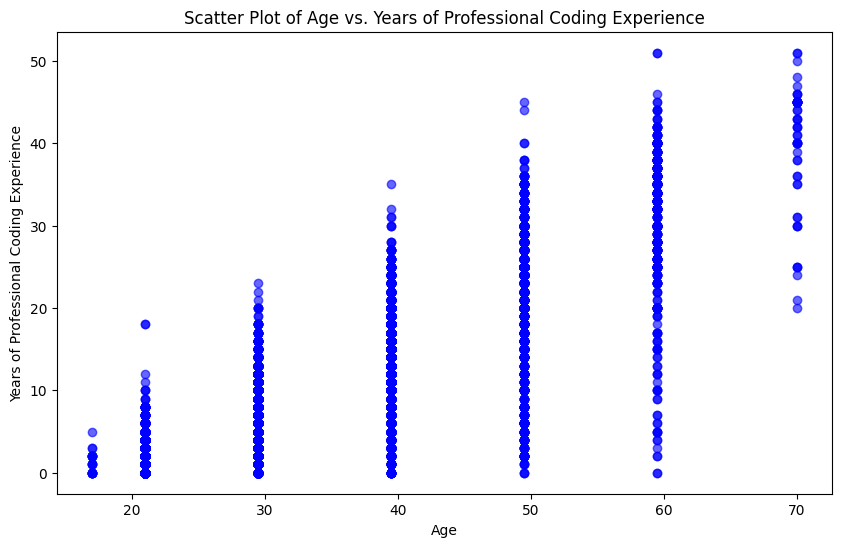

In [25]:
# Write your code here

# Age mapping
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


Expanded DataFrame for Scatter Plot:
         Age  JobSatPoints_6  ConvertedCompYearly
0      17.0             NaN                  NaN
1      39.5             0.0                  NaN
2      49.5             NaN                  NaN
3      21.0             NaN                  NaN
4      21.0             NaN                  NaN
...     ...             ...                  ...
65110  21.0             NaN                  NaN
65111  29.5             NaN                  NaN
65112  29.5             NaN                  NaN
65113  21.0             0.0                  NaN
65114  21.0             NaN                  NaN

[65115 rows x 3 columns]


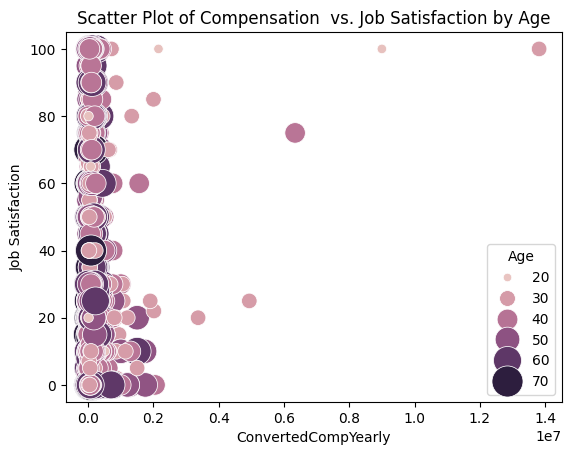

In [39]:
## Write your code here
# Mapping age ranges to numerical values (midpoints)
age_mapping = { 
    'Under 18 years old': 17, 
    '18-24 years old': 21, 
    '25-34 years old': 29.5, 
    '35-44 years old': 39.5, 
    '45-54 years old': 49.5, 
    '55-64 years old': 59.5, 
    '65 years or older': 70, 
    'Prefer not to say': None # Or choose to exclude this category 
}

# Expand the dataset based on counts
expanded_ages = [] 
job_satisfaction = []
converted_comp = []
for _, row in df.iterrows():
    age_range = row['Age']
    if age_range in age_mapping and age_mapping[age_range] and df['JobSatPoints_6'] is not None:
        expanded_ages.append(age_mapping[age_range])
        job_satisfaction.append(row['JobSatPoints_6']) 
        converted_comp.append(row['ConvertedCompYearly'])

# Create a DataFrame from the expanded ages and work week hours
expanded_df = pd.DataFrame({'Age': expanded_ages, 'JobSatPoints_6': job_satisfaction, 'ConvertedCompYearly': converted_comp})
sns.scatterplot(
    x='ConvertedCompYearly', 
    y='JobSatPoints_6', 
    data=expanded_df, 
    size='Age',
    hue='Age',
    sizes=(10, 500)
)
print("Expanded DataFrame for Scatter Plot:\n", expanded_df)

# Create the scatter plot
# plt.figure(figsize=(10, 6))

plt.title('Scatter Plot of Compensation  vs. Job Satisfaction by Age')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Job Satisfaction')
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


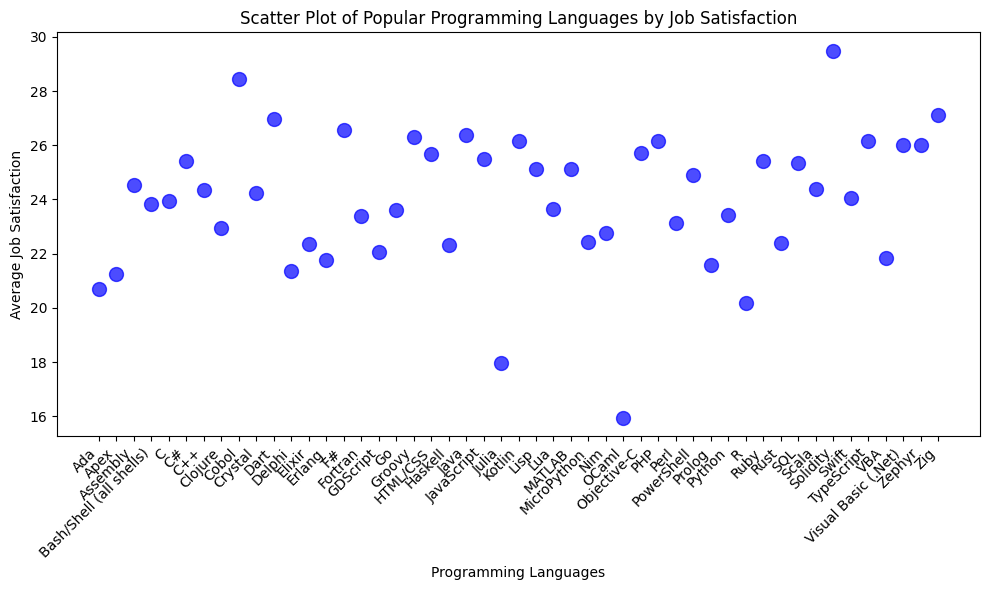

In [43]:
# Step 1: Expand 'LanguageHaveWorkedWith' into multiple rows
data_expanded = df1.assign(LanguageHaveWorkedWith=df1['LanguageHaveWorkedWith'].str.split(';')).explode('LanguageHaveWorkedWith')

# Step 2: Group by programming languages and calculate average job satisfaction
language_satisfaction = data_expanded.groupby('LanguageHaveWorkedWith')['JobSatPoints_6'].mean().reset_index()

# Step 3: Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    language_satisfaction['LanguageHaveWorkedWith'], 
    language_satisfaction['JobSatPoints_6'], 
    s=100,  # Adjust point size
    alpha=0.7, 
    c='blue'
)

# Step 4: Add labels and title
plt.title('Scatter Plot of Popular Programming Languages by Job Satisfaction')
plt.xlabel('Programming Languages')
plt.ylabel('Average Job Satisfaction')
plt.xticks(rotation=45, ha='right')  # Rotate language labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


/tmp/ipykernel_83/2392543856.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


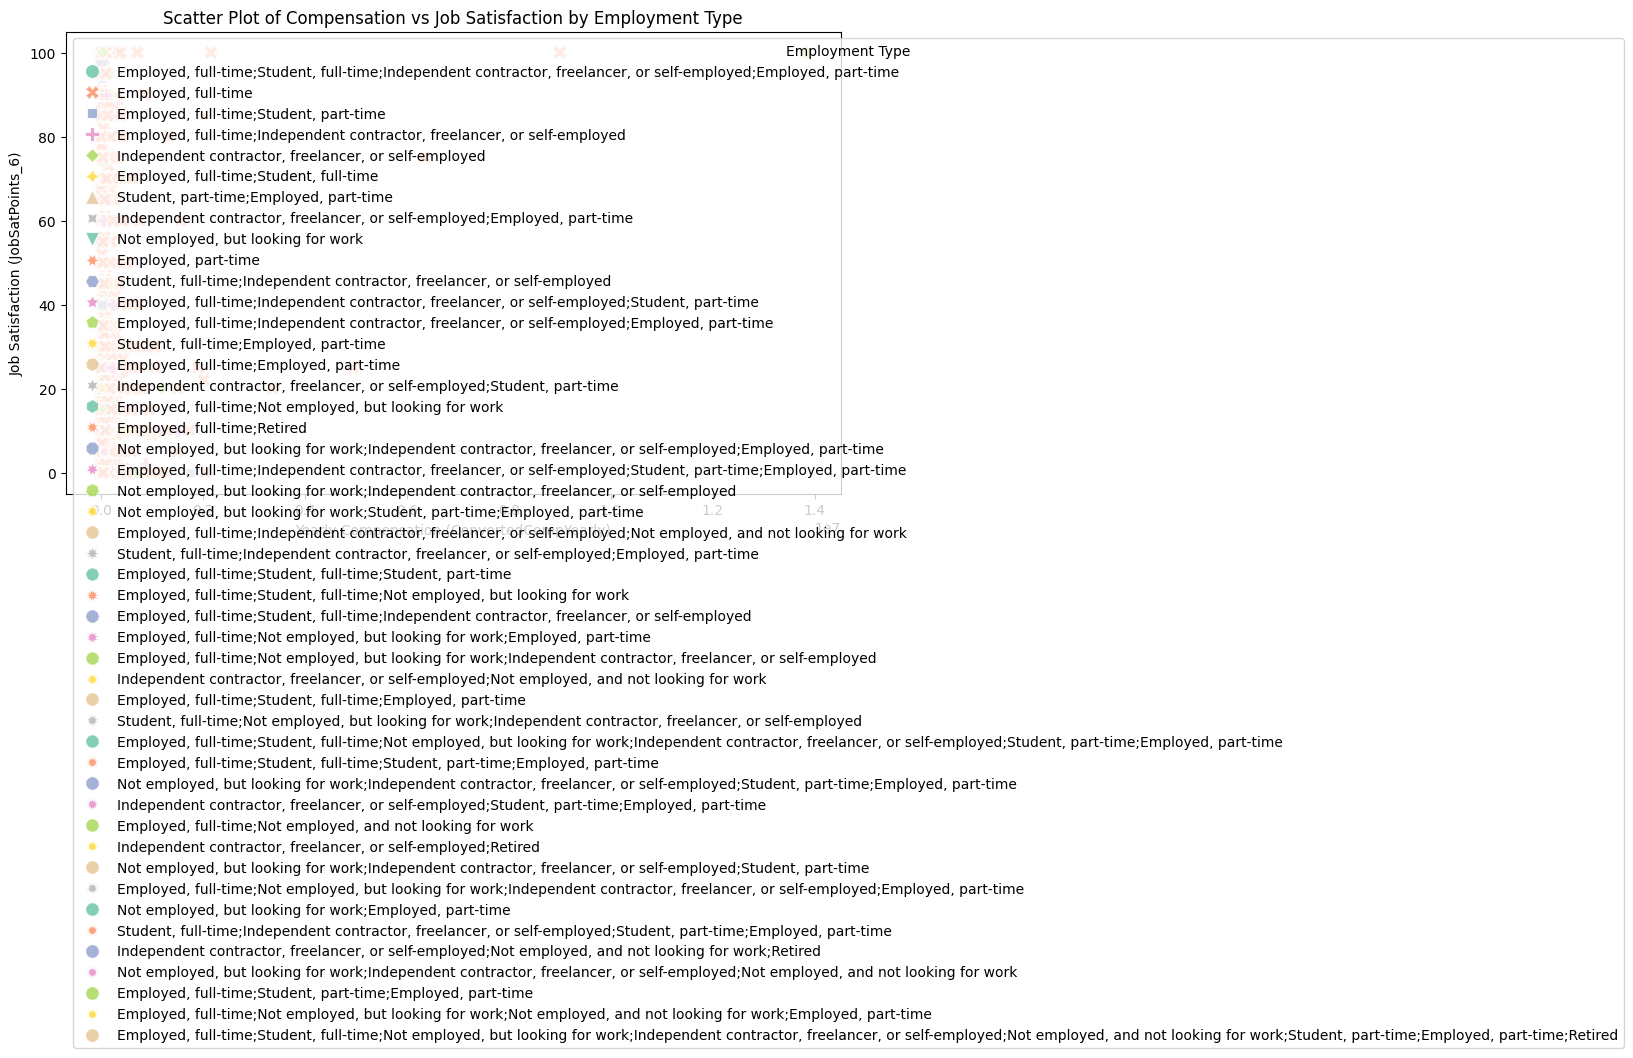

In [44]:
## Write your code here

data = df1.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='ConvertedCompYearly', 
    y='JobSatPoints_6', 
    hue='Employment',  # Differentiate by employment type
    style='Employment',  # Use different markers for categories
    palette='Set2',  # Customize the color palette
    data=data,
    s=100,  # Set marker size
    alpha=0.8  # Transparency for overlapping points
)

# Add labels and title
plt.title('Scatter Plot of Compensation vs Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.legend(title='Employment Type', loc='upper left')  # Add legend for employment types

# Show plot
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


Expanded DataFrame for Scatter Plot:
         Age                                            Country  YearsCodePro
0      17.0                           United States of America           NaN
1      39.5  United Kingdom of Great Britain and Northern I...          17.0
2      49.5  United Kingdom of Great Britain and Northern I...          27.0
3      21.0                                             Canada           NaN
4      21.0                                             Norway           NaN
...     ...                                                ...           ...
65110  21.0                                                NaN           3.0
65111  29.5                                                NaN           NaN
65112  29.5                                                NaN           5.0
65113  21.0                                            Germany           2.0
65114  21.0                                                NaN           NaN

[65115 rows x 3 columns]


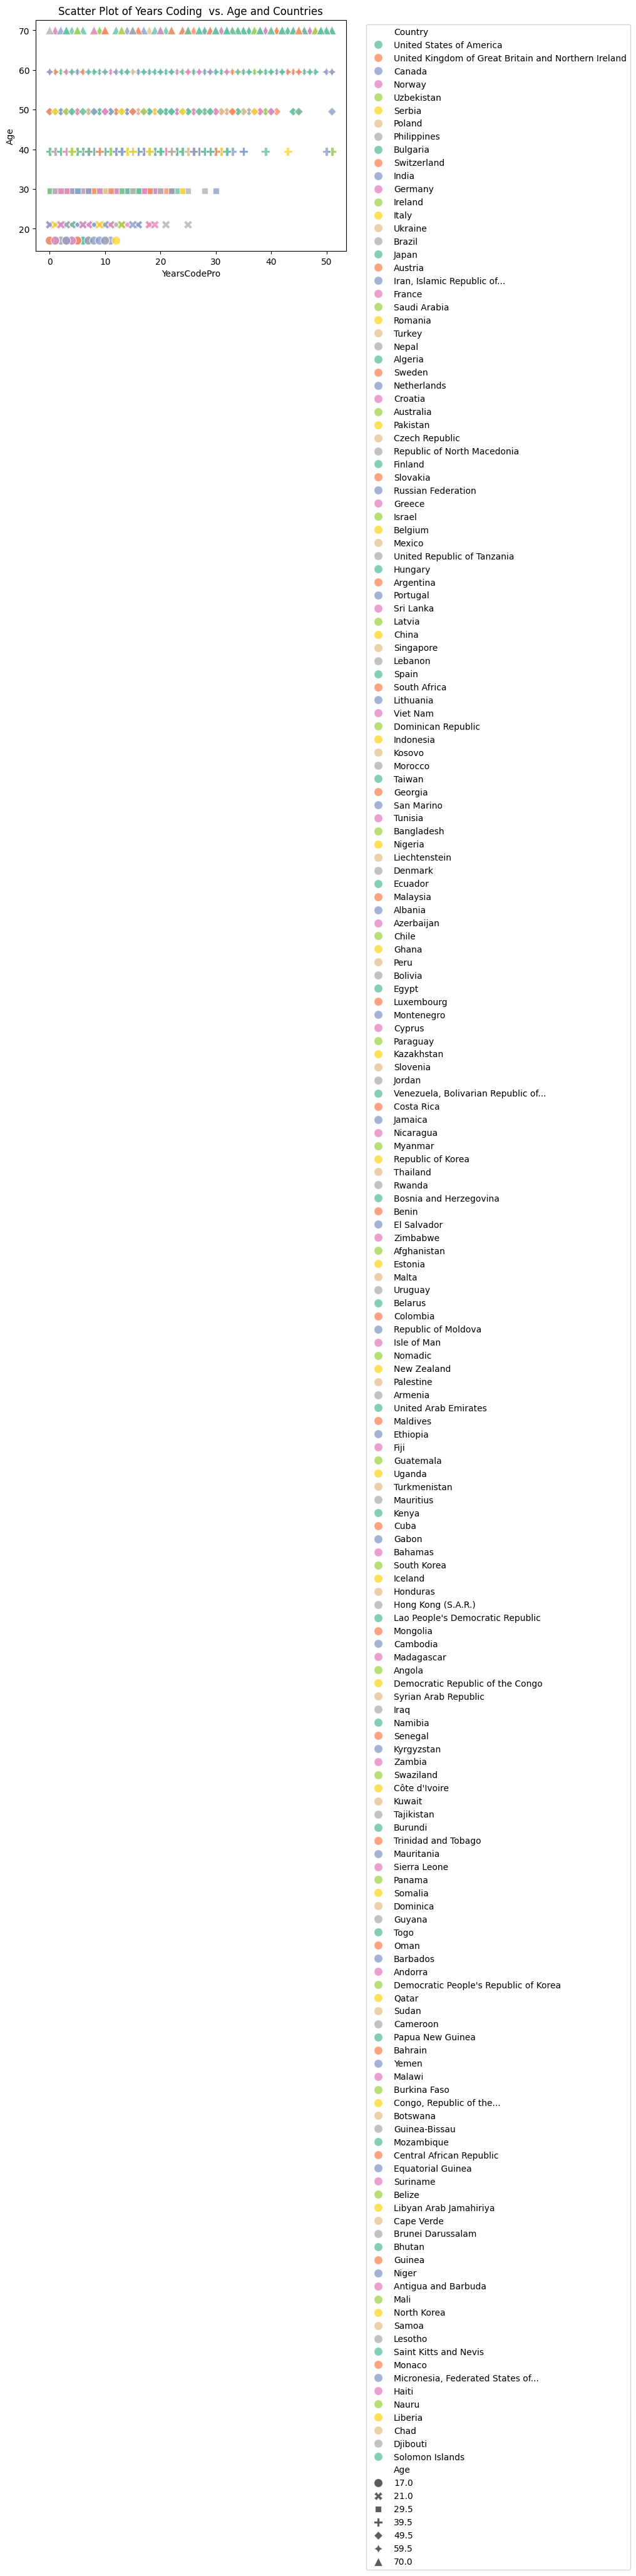

In [57]:
# Mapping age ranges to numerical values (midpoints)
age_mapping = { 
    'Under 18 years old': 17, 
    '18-24 years old': 21, 
    '25-34 years old': 29.5, 
    '35-44 years old': 39.5, 
    '45-54 years old': 49.5, 
    '55-64 years old': 59.5, 
    '65 years or older': 70, 
    'Prefer not to say': None # Or choose to exclude this category 
}

# Expand the dataset based on counts
expanded_ages = [] 
country = []
years_code = []

for _, row in df.iterrows():
    age_range = row['Age']
    if age_range in age_mapping and age_mapping[age_range] is not None:
        expanded_ages.append(age_mapping[age_range])
        years_code.append(row['YearsCodePro'])
        country.append(row['Country'])

# Create a DataFrame from the expanded ages and work week hours
expanded_df = pd.DataFrame({'Age': expanded_ages, 'Country': country, 'YearsCodePro': years_code})
sns.scatterplot(
    x='YearsCodePro', 
    y='Age', 
    data=expanded_df,
    hue='Country',        # Color coding by country
    style='Age',          # Different markers for age groups
    s=100,                # Marker size
    alpha=0.8,            # Transparency
    palette='Set2'
)
print("Expanded DataFrame for Scatter Plot:\n", expanded_df)

# Create the scatter plot
# plt.figure(figsize=(10, 6))

plt.title('Scatter Plot of Years Coding  vs. Age and Countries')
plt.xlabel('YearsCodePro')
plt.ylabel('Age')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
